In [ ]:
!pip install tikzplotlib

In [ ]:
import pandas as pd
import numpy as np

dataset8=pd.read_csv('data_train.csv')

cnn_indices=list(np.where(dataset8['model']=='cnn')[0])
hd_indices=list(np.where(dataset8['model']=='onlinehd')[0])
cnn2_indices=list(np.where(dataset8['model']=='cnn2')[0])


time=list(dataset8['realtive time(sec)'])

temp=list(dataset8['temperature (Celcius)'])
cpu=list(dataset8['cpu load(pct)'])
power=list(dataset8['power'])
frequency=list(dataset8['cpu freq(Hz)'])

In [ ]:
realtive_time_hd=time[min(hd_indices):(max(hd_indices)+1)]
realtive_time_cnn=time[min(cnn_indices):(max(cnn_indices)+1)]
realtive_time_cnn2=time[min(cnn2_indices):(max(cnn2_indices)+1)]



onlinehd_temp=temp[min(hd_indices):(max(hd_indices)+1)]
cnn_temp=temp[min(cnn_indices):(max(cnn_indices)+1)]
cnn2_temp=temp[min(cnn2_indices):(max(cnn2_indices)+1)]

onlinehd_cpu=cpu[min(hd_indices):(max(hd_indices)+1)]
cnn_cpu=cpu[min(cnn_indices):(max(cnn_indices)+1)]
cnn2_cpu=cpu[min(cnn2_indices):(max(cnn2_indices)+1)]

#d = {'onlinehd temp':onlinehd_temp , 'cnn temp':cnn_temp, 'cnn2 temp':cnn2_temp, 'edge temp':edge_temp, 'realtive time edge(sec)':realtive_time_edge,'edge aware temp':edge_aware_temp, 'realtive time aware edge(sec)':realtive_time_edge_aware,'realtive time cnn(sec)':realtive_time_cnn,'realtive time cnn2(sec)':realtive_time_cnn2, 'realtive time hd(sec)':realtive_time_hd,'onlinehd cpu':onlinehd_cpu,'cnn cpu':cnn_cpu,'cnn2 cpu':cnn2_cpu, 'edge cpu':edge_cpu, 'edge aware cpu':edge_aware_cpu }


# df8_hdtemp=pd.DataFrame(data={'onlinehd temp':onlinehd_temp})


'''final variables'''

'''time'''
x1=list(realtive_time_cnn)
x2=list(realtive_time_hd)
x3=list(realtive_time_cnn2)


In [ ]:
hd_temp_avg=np.average(onlinehd_temp)
cnn1_temp_avg=np.average(cnn_temp)
cnn2_temp_avg=np.average(cnn2_temp)
print(hd_temp_avg, cnn1_temp_avg, cnn2_temp_avg)

66.88751313388265 69.94038542607649 72.71370792204506


In [ ]:
hd_cpu_avg=np.average(onlinehd_cpu)
cnn1_cpu_avg=np.average(cnn_cpu)
cnn2_cpu_avg=np.average(cnn2_cpu)
print(hd_cpu_avg, cnn1_cpu_avg, cnn2_cpu_avg)

96.4287728806061 81.34755194218609 89.64246013667426


In [ ]:
!sudo apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng
!pip install latex

In [ ]:
!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


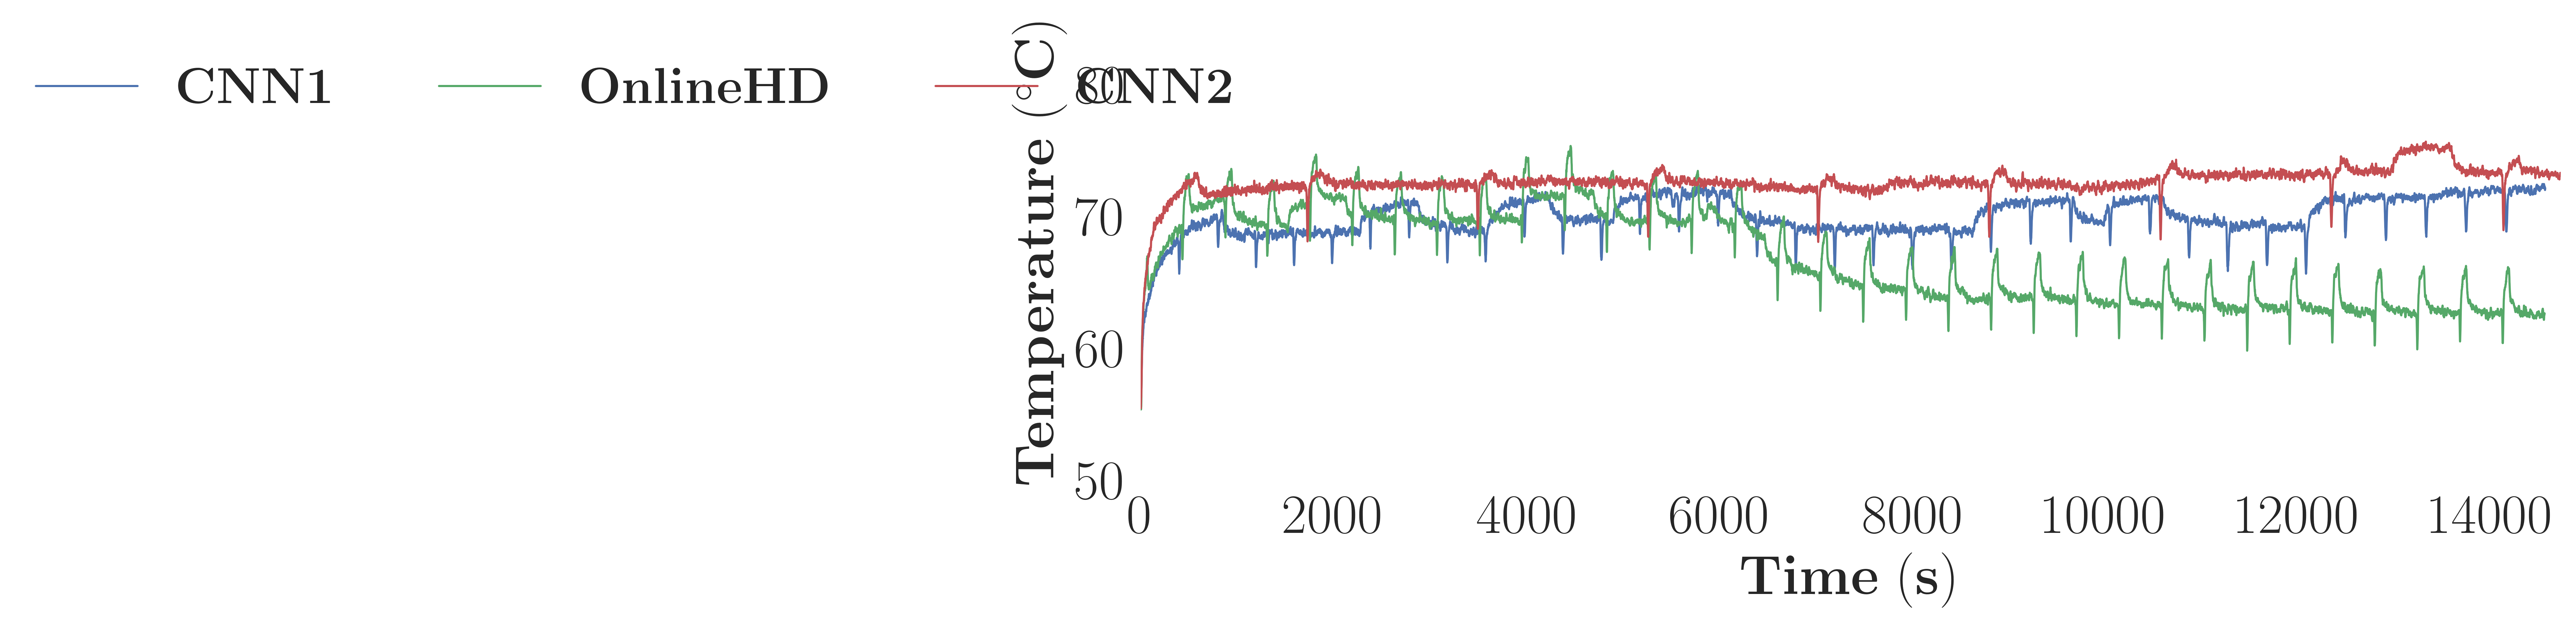

In [ ]:
# Temperature plot
import matplotlib
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
# from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


# Using seaborn's style
plt.style.use('seaborn')

# rc('font', weight='bold')
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 26,
    "font.size": 26,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 26,
    "xtick.labelsize": 26,
    "ytick.labelsize": 26
}

plt.rcParams.update(tex_fonts)

figure(figsize=(12, 4), dpi=500)

d = {'onlinehd temp':onlinehd_temp , 'cnn temp':cnn_temp, 'cnn2 temp':cnn2_temp, 'realtive time cnn2(sec)':realtive_time_cnn2,'realtive time cnn(sec)':realtive_time_cnn, 'realtive time hd(sec)':realtive_time_hd,'onlinehd cpu':onlinehd_cpu,'cnn cpu':cnn_cpu, 'cnn2 cpu':cnn2_cpu}



df8_hdtemp=pd.DataFrame(data={'onlinehd temp':onlinehd_temp})
df8_cnntemp=pd.DataFrame(data={'cnn temp':cnn_temp})
df8_cnn2temp=pd.DataFrame(data={'cnn2 temp':cnn2_temp})


y2=list(df8_hdtemp['onlinehd temp'].rolling(10, min_periods=1).mean())
y1=list(df8_cnntemp['cnn temp'].rolling(10, min_periods=1).mean())
y3=list(df8_cnn2temp['cnn2 temp'].rolling(10, min_periods=1).mean())


plt.plot(x1, y1, lw=1, label=r"$\bf{CNN1}$")
plt.plot(x2, y2, lw=1, label=r"$\bf{OnlineHD}$")
plt.plot(x3, y3,lw=1, label=r"$\bf{CNN2}$")

ax = plt.gca()
ax.set_xlim([0, 14700])
ax.set_ylim([50, 85])
plt.legend(bbox_to_anchor =(0.10, 1.0), ncol = 3,  prop={"size":24})

plt.xlabel(r"$\bf{Time\ (s)}$")
plt.ylabel(r"$\bf{Temperature\ (^\circ C)}$")

ax = plt.axes()
  
# Setting the background color of the plot 
# using set_facecolor() method
ax.set_facecolor("white")

plt.grid(False)
#import tikzplotlib

# plt.savefig('temperature.pgf')
plt.savefig('temperature.pdf', format='pdf', bbox_inches='tight')
plt.savefig('temperature.svg')
plt.savefig('temperature.png')
#plt.savefig('histogram.pgf')

#tikzplotlib.save("temperature.tex")

#plt.show()
# plt.xlabel("$\text{time (s)}")
# plt.ylabel("$\text{Temperature (°C)}")
# plt.title("Simple plot $\\frac{\\alpha}{2}$")

import tikzplotlib

tikzplotlib.save("temperature.tex")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


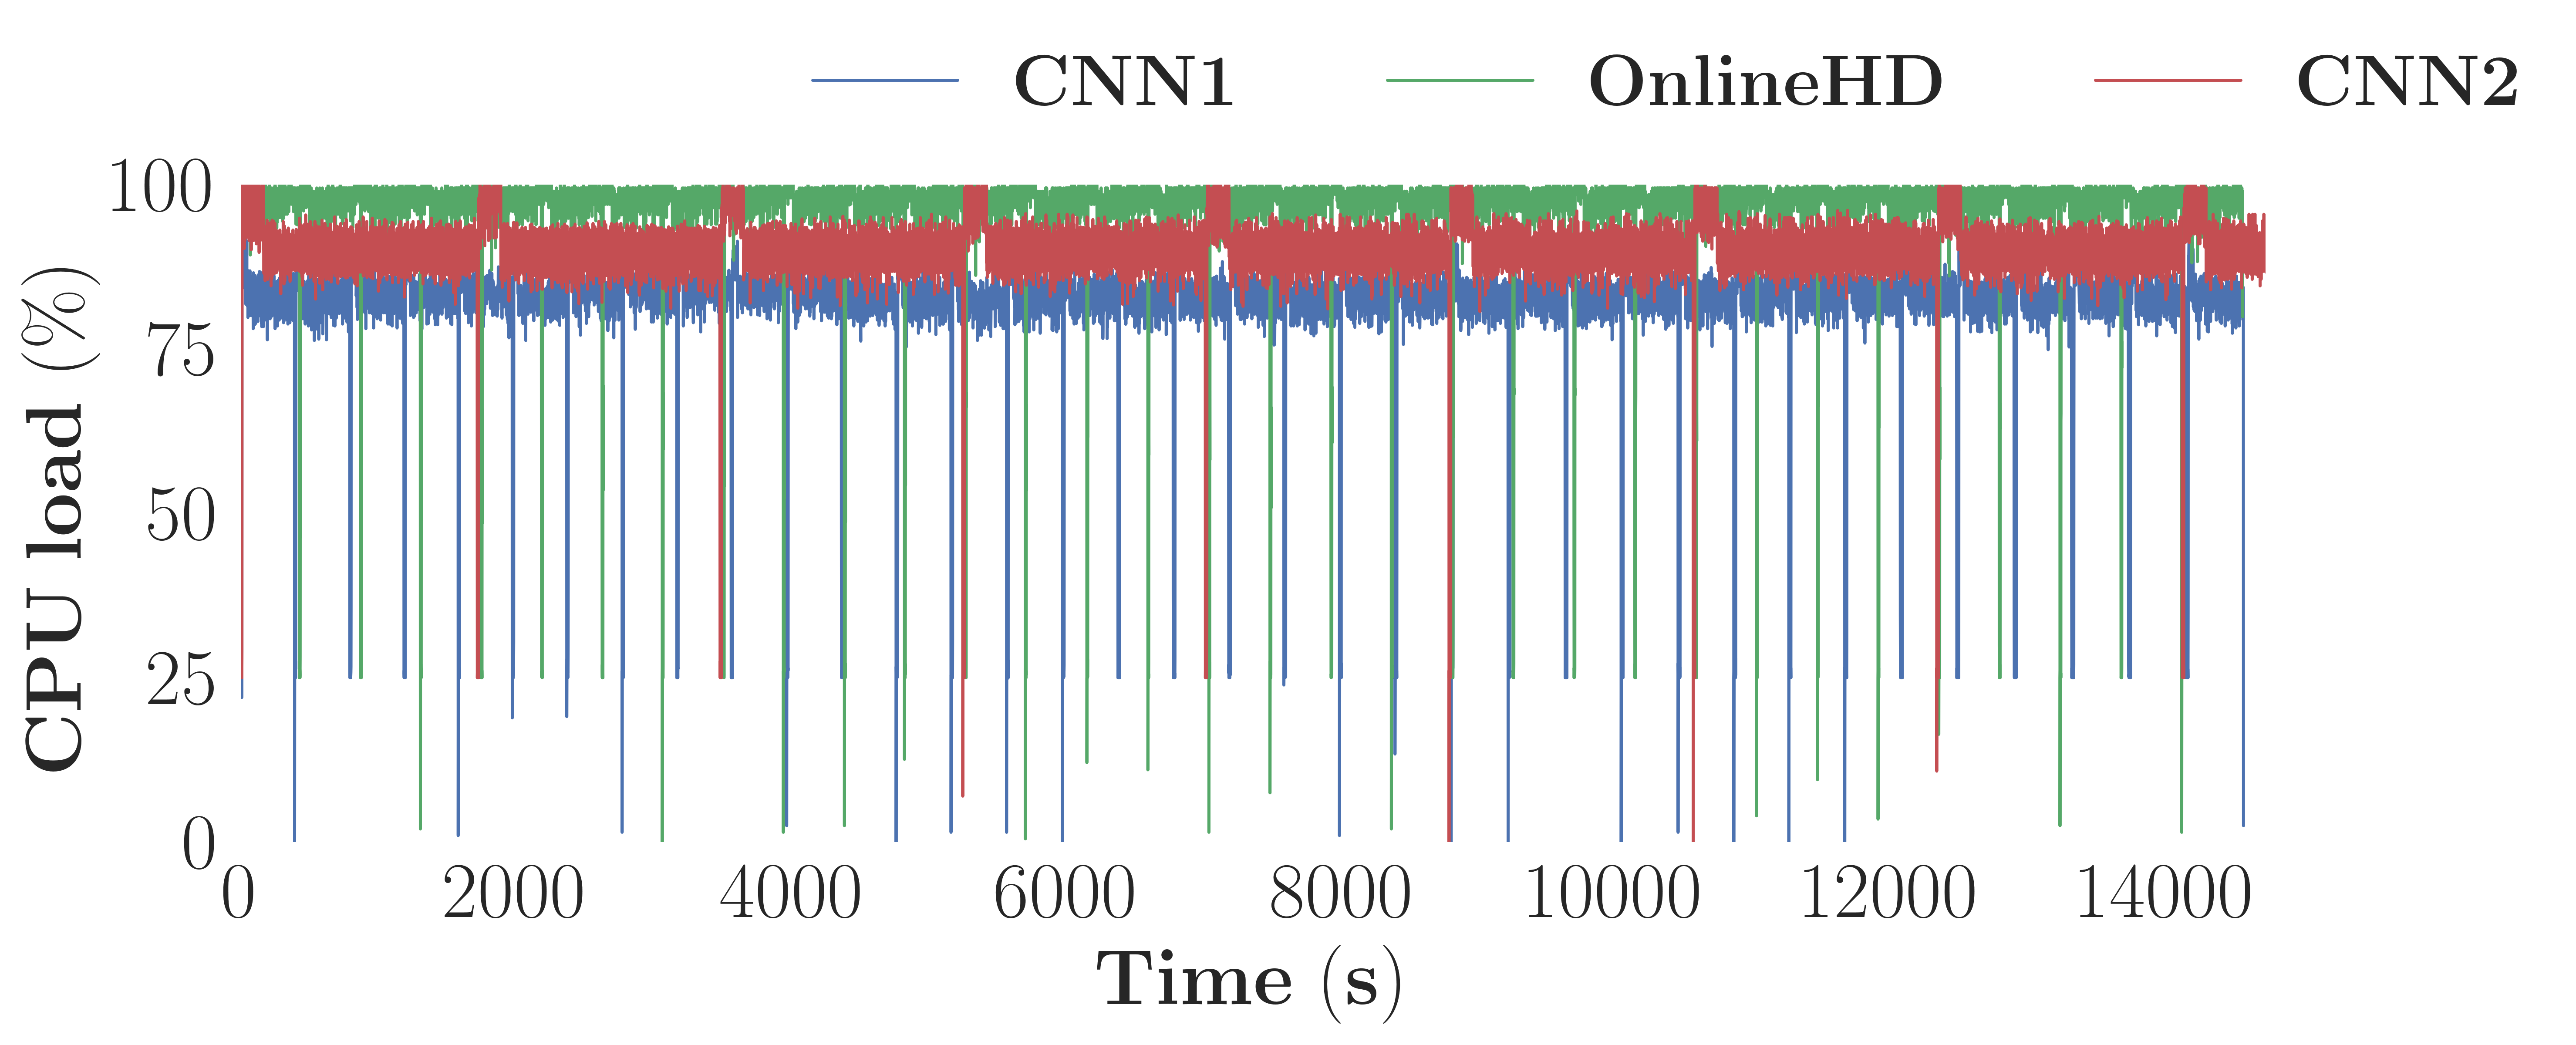

In [ ]:
'''CPU Load'''
import matplotlib
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })



import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

#plt.style.use('seaborn')

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 26,
    "font.size": 26,
    
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 26,
    "xtick.labelsize": 26,
    "ytick.labelsize": 26
}

plt.rcParams.update(tex_fonts)
#matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
figure(figsize=(12, 4), dpi=500)

d = {'onlinehd temp':onlinehd_temp , 'cnn temp':cnn_temp, 'cnn2 temp':cnn2_temp, 'realtive time cnn2(sec)':realtive_time_cnn2,'realtive time cnn(sec)':realtive_time_cnn, 'realtive time hd(sec)':realtive_time_hd,'onlinehd cpu':onlinehd_cpu,'cnn cpu':cnn_cpu, 'cnn2 cpu':cnn2_cpu}



df8_hdcpu=pd.DataFrame(data={'onlinehd cpu':onlinehd_cpu})
df8_cnncpu=pd.DataFrame(data={'cnn cpu':cnn_cpu})
df8_cnn2cpu=pd.DataFrame(data={'cnn2 cpu':cnn2_cpu})


#y2=list(df8_hdcpu['onlinehd cpu'].rolling(10, min_periods=1).mean())
#y1=list(df8_cnncpu['cnn cpu'].rolling(10, min_periods=1).mean())
#y3=list(df8_cnn2cpu['cnn2 cpu'].rolling(10, min_periods=1).mean())
y2=list(df8_hdcpu['onlinehd cpu'])
y1=list(df8_cnncpu['cnn cpu'])
y3=list(df8_cnn2cpu['cnn2 cpu'])

plt.plot(x1, y1, lw=1, label=r"$\bf{CNN1}$")
plt.plot(x2, y2, lw=1, label=r"$\bf{OnlineHD}$")
plt.plot(x3, y3,lw=1, label=r"$\bf{CNN2}$")

ax = plt.gca()
ax.set_xlim([0, 14700])
ax.set_ylim([0, 100])

plt.legend(bbox_to_anchor =(0.25, 1.0), ncol = 3, prop={"size":24})

plt.xlabel(r"$\bf{Time\ (s)}$")
plt.ylabel(r"$\bf{CPU\ load\ (\%)}$")

ax = plt.axes()
  
# Setting the background color of the plot 
# using set_facecolor() method
ax.set_facecolor("white")

plt.grid(False)
#import tikzplotlib

#plt.show()
# plt.savefig('temperature.pgf')
plt.savefig('cpu.pdf', format='pdf', bbox_inches='tight')
plt.savefig('cpu.svg')
plt.savefig('cpu.png')
#plt.savefig('histogram.pgf')

#tikzplotlib.save("temperature.tex")

#plt.show()
# plt.xlabel("$\text{time (s)}")
# plt.ylabel("$\text{Temperature (°C)}")
# plt.title("Simple plot $\\frac{\\alpha}{2}$")

import tikzplotlib

tikzplotlib.save("cpu.tex")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 6000x2000 with 0 Axes>

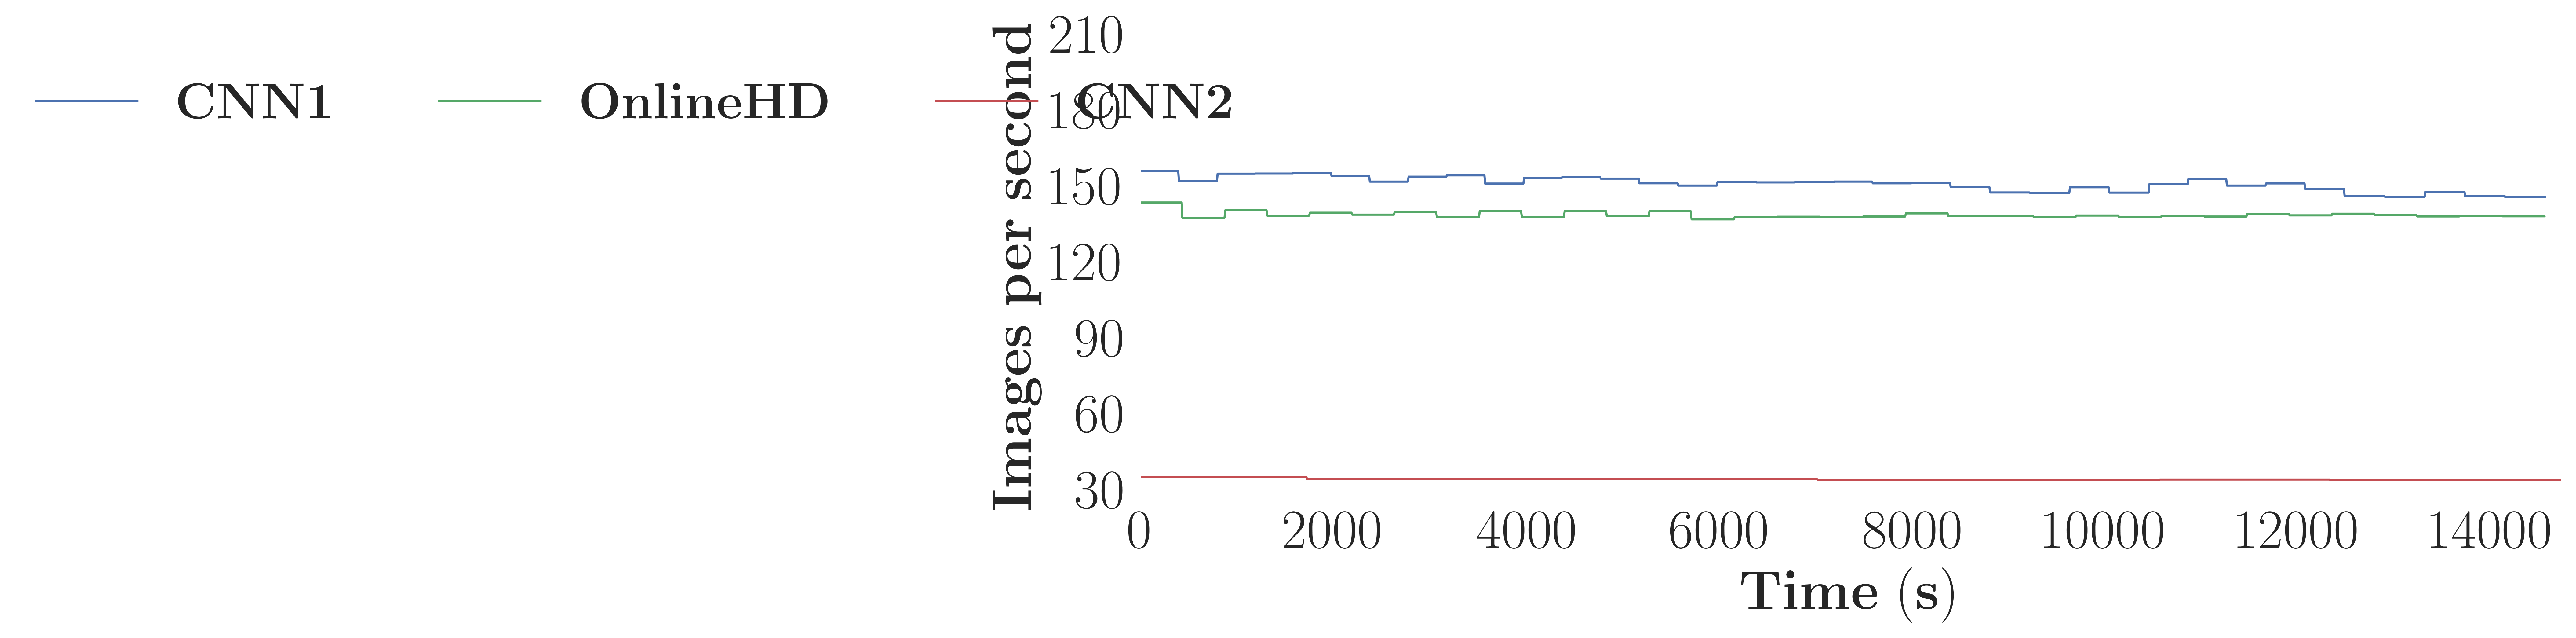

In [ ]:
'''Images processed'''

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

#plt.style.use('seaborn')

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 26,
    "font.size": 26,
    
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 26,
    "xtick.labelsize": 26,
    "ytick.labelsize": 26
}

plt.rcParams.update(tex_fonts)
#matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
figure(figsize=(12, 4), dpi=500)


df3 = pd.read_csv('cnn1/train.csv')

'''onlineHD'''
df4=pd.read_csv('hd/train.csv')

'''CNN2'''
df51=pd.read_csv('cnn2/train.csv')

figure(figsize=(12, 4), dpi=500)

#onlinehd images per minute calculation
tb=list(df4['train begin'])
te=list(df4['train end'])
y2=[]
x3=[]
for x,y in zip(tb,te):
    minimum=(y-x)
    ipm=round((60000/minimum),2)
    
    x3.append(ipm)
    x3.append(ipm)
    
    y2.append(x)
    y2.append(y)

#CNN images per minute
tb=list(df3['train begin'])
te=list(df3['train end'])
y6=[]
x4=[]
for x,y in zip(tb,te):
    minimum=(y-x)
    ipm=round((60000/minimum),2)
    
    x4.append(ipm)
    x4.append(ipm)
    
    y6.append(x)
    y6.append(y)



#cnn2 images per minute
tb=list(df51['train begin'])
te=list(df51['train end'])
y55=[]
x55=[]
for x,y in zip(tb,te):
    minimum=(y-x)
    ipm=round((60000/minimum),2)
    
    x55.append(ipm)
    x55.append(ipm)
    
    y55.append(x)
    y55.append(y)




plt.plot(y6, x4, lw=1, label=r"$\bf{CNN1}$")
plt.plot(y2, x3, lw=1, label=r"$\bf{OnlineHD}$")
plt.plot(y55, x55,lw=1, label=r"$\bf{CNN2}$")



ax = plt.gca()
ax.set_xlim([0, 14700])
#ax.set_ylim([30, 210])
plt.yticks([30,60,90,120,150,180,210])

plt.legend(bbox_to_anchor =(0.10, 1.0), ncol = 3, prop={"size":24})

plt.xlabel(r"$\bf{Time\ (s)}$")
plt.ylabel(r"$\bf{Images\ per\ second}$")

ax = plt.axes()
  
ax.set_facecolor("white")

plt.grid(False)

plt.savefig('ips.pdf', format='pdf', bbox_inches='tight')
plt.savefig('ips.svg')
plt.savefig('ips.png')


import tikzplotlib
tikzplotlib.save("ips.tex")

In [ ]:
#onlinehd images per minute calculation
tb=list(df4['train begin'])
te=list(df4['train end'])
hdipm=[]
for x,y in zip(tb,te):
    minimum=(y-x)
    ipm=round((60000/minimum),2)
    
    hdipm.append(ipm)

#CNN images per minute
tb=list(df3['train begin'])
te=list(df3['train end'])
cnn1ipm=[]
for x,y in zip(tb,te):
    minimum=(y-x)
    ipm=round((60000/minimum),2)
    
    cnn1ipm.append(ipm)

#cnn2 images per minute
tb=list(df51['train begin'])
te=list(df51['train end'])
cnn2ipm=[]
for x,y in zip(tb,te):
    minimum=(y-x)
    ipm=round((60000/minimum),2)
    
    cnn2ipm.append(ipm)


hd_ipm_avg=np.average(hdipm)
cnn1_ipm_avg=np.average(cnn1ipm)
cnn2_ipm_avg=np.average(cnn2ipm)
print(hd_ipm_avg, cnn1_ipm_avg, cnn2_ipm_avg)


138.65060606060607 150.94416666666666 34.13444444444445


In [ ]:
onlinehd_power=power[min(hd_indices):(max(hd_indices)+1)]
cnn_power=power[min(cnn_indices):(max(cnn_indices)+1)]
cnn2_power=power[min(cnn2_indices):(max(cnn2_indices)+1)]



onlinehd_freq=frequency[min(hd_indices):(max(hd_indices)+1)]
cnn_freq=frequency[min(cnn_indices):(max(cnn_indices)+1)]
cnn2_freq=frequency[min(cnn2_indices):(max(cnn2_indices)+1)]



onlinehd_cpu=cpu[min(hd_indices):(max(hd_indices)+1)]
cnn_cpu=cpu[min(cnn_indices):(max(cnn_indices)+1)]
cnn2_cpu=cpu[min(cnn2_indices):(max(cnn2_indices)+1)]


x1=list(realtive_time_cnn)
x2=list(realtive_time_hd)
x3=list(realtive_time_cnn2)


In [ ]:
hd_power_avg=np.average(onlinehd_power)
cnn1_power_avg=np.average(cnn_power)
cnn2_power_avg=np.average(cnn2_power)
print(hd_power_avg, cnn1_power_avg, cnn2_power_avg)

4.404676768235359 4.395556760012044 4.463136927360163


In [ ]:
hd_freq_avg=np.average(onlinehd_freq)
cnn1_freq_avg=np.average(cnn_freq)
cnn2_freq_avg=np.average(cnn2_freq)
print(hd_freq_avg, cnn1_freq_avg, cnn2_freq_avg)

1000.5674368191119 1000.6985022583558 1000.626052138699


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


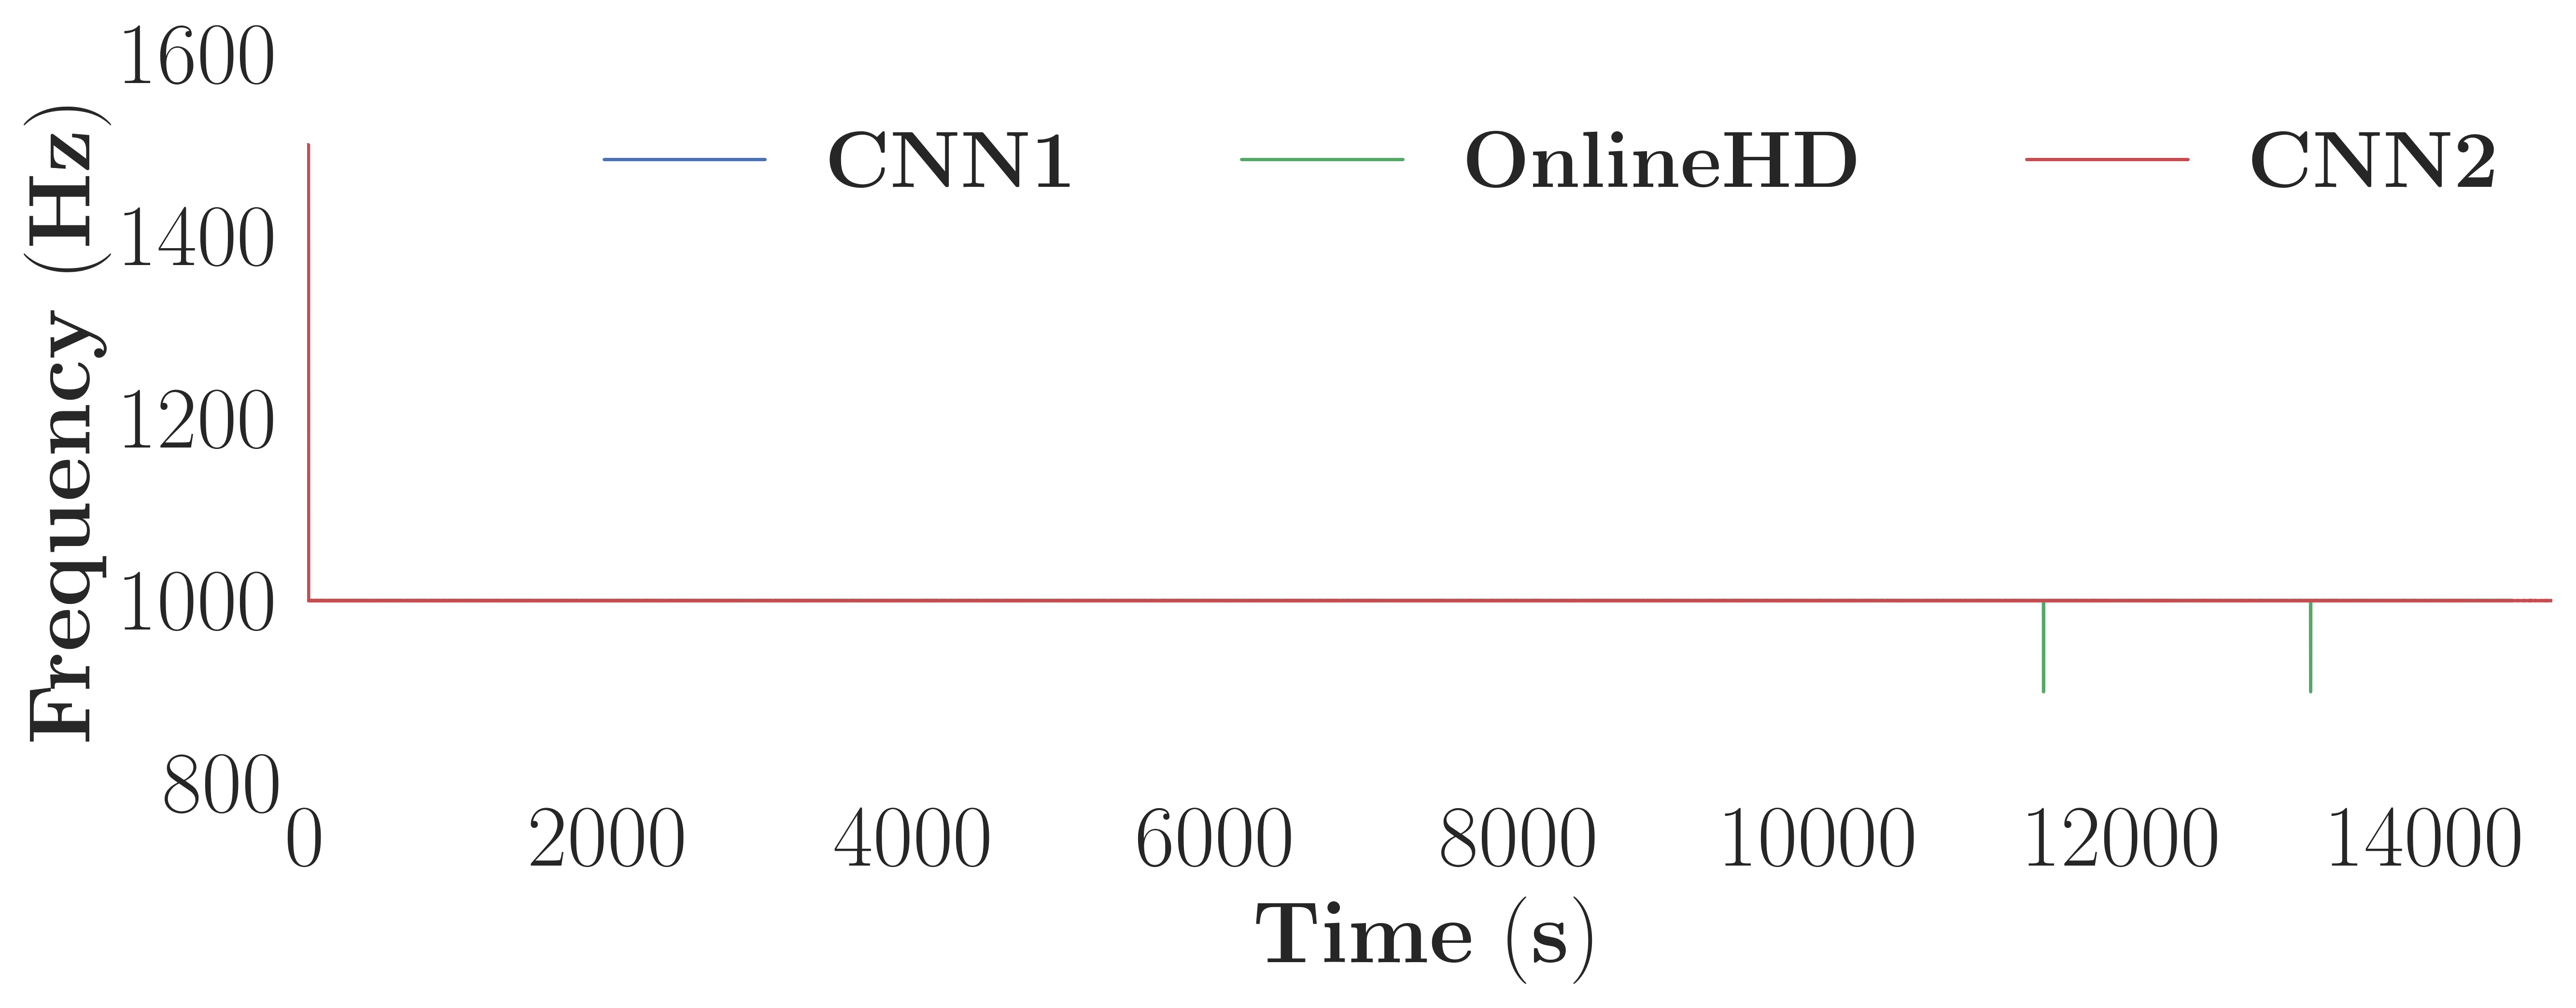

In [ ]:
'''Frequency'''

import matplotlib
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
# from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


# Using seaborn's style
# plt.style.use('seaborn')

# rc('font', weight='bold')
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 26,
    "font.size": 26,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 26,
    "xtick.labelsize": 26,
    "ytick.labelsize": 26
}

plt.rcParams.update(tex_fonts)

figure(figsize=(12, 4), dpi=500)

d = {'onlinehd power':onlinehd_power,'cnn power':cnn_power,'onlinehd frequency':onlinehd_freq,'cnn frequency':cnn_freq,'onlinehd temp':onlinehd_temp , 'cnn temp':cnn_temp, 'realtive time cnn(sec)':realtive_time_cnn, 'realtive time hd(sec)':realtive_time_hd,'onlinehd cpu':onlinehd_cpu,'cnn cpu':cnn_cpu}


df8_hdfreq=pd.DataFrame(data={'onlinehd frequency':onlinehd_freq})
df8_cnnfreq=pd.DataFrame(data={'cnn frequency':cnn_freq})
df8_cnn2freq=pd.DataFrame(data={'cnn2 frequency':cnn2_freq})


y2=list(df8_hdfreq['onlinehd frequency'])
y1=list(df8_cnnfreq['cnn frequency'])
y3=list(df8_cnn2freq['cnn2 frequency'])


plt.plot(x1, y1, lw=1, label=r"$\bf{CNN1}$")
plt.plot(x2, y2, lw=1, label=r"$\bf{OnlineHD}$")
plt.plot(x3, y3,lw=1, label=r"$\bf{CNN2}$")

ax = plt.gca()
ax.set_xlim([0, 14800])
ax.set_ylim([800, 1600])
plt.legend(bbox_to_anchor =(0.10, 1.0), ncol = 3,  prop={"size":24})

plt.xlabel(r"$\bf{Time\ (s)}$")
plt.ylabel(r"$\bf{Frequency\ (Hz)}$")

ax = plt.axes()
  
# Setting the background color of the plot 
# using set_facecolor() method
ax.set_facecolor("white")

plt.grid(False)
#import tikzplotlib

# plt.savefig('temperature.pgf')
plt.savefig('frequency.pdf', format='pdf', bbox_inches='tight')
plt.savefig('frequency.svg')
plt.savefig('frequency.png')
#plt.savefig('histogram.pgf')

#tikzplotlib.save("temperature.tex")

#plt.show()
# plt.xlabel("$\text{time (s)}")
# plt.ylabel("$\text{Temperature (°C)}")
# plt.title("Simple plot $\\frac{\\alpha}{2}$")

import tikzplotlib

tikzplotlib.save("frequency.tex")



In [ ]:
'''Power'''

y1=list(onlinehd_power)
y2=list(cnn_power)
y3=list(cnn2_power)

#hd energy
y4=np.multiply(x2,y1)
#cnn1 energy
y5=np.multiply(x1,y2)
#cnn2 energy
y6=np.multiply(x3,y3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


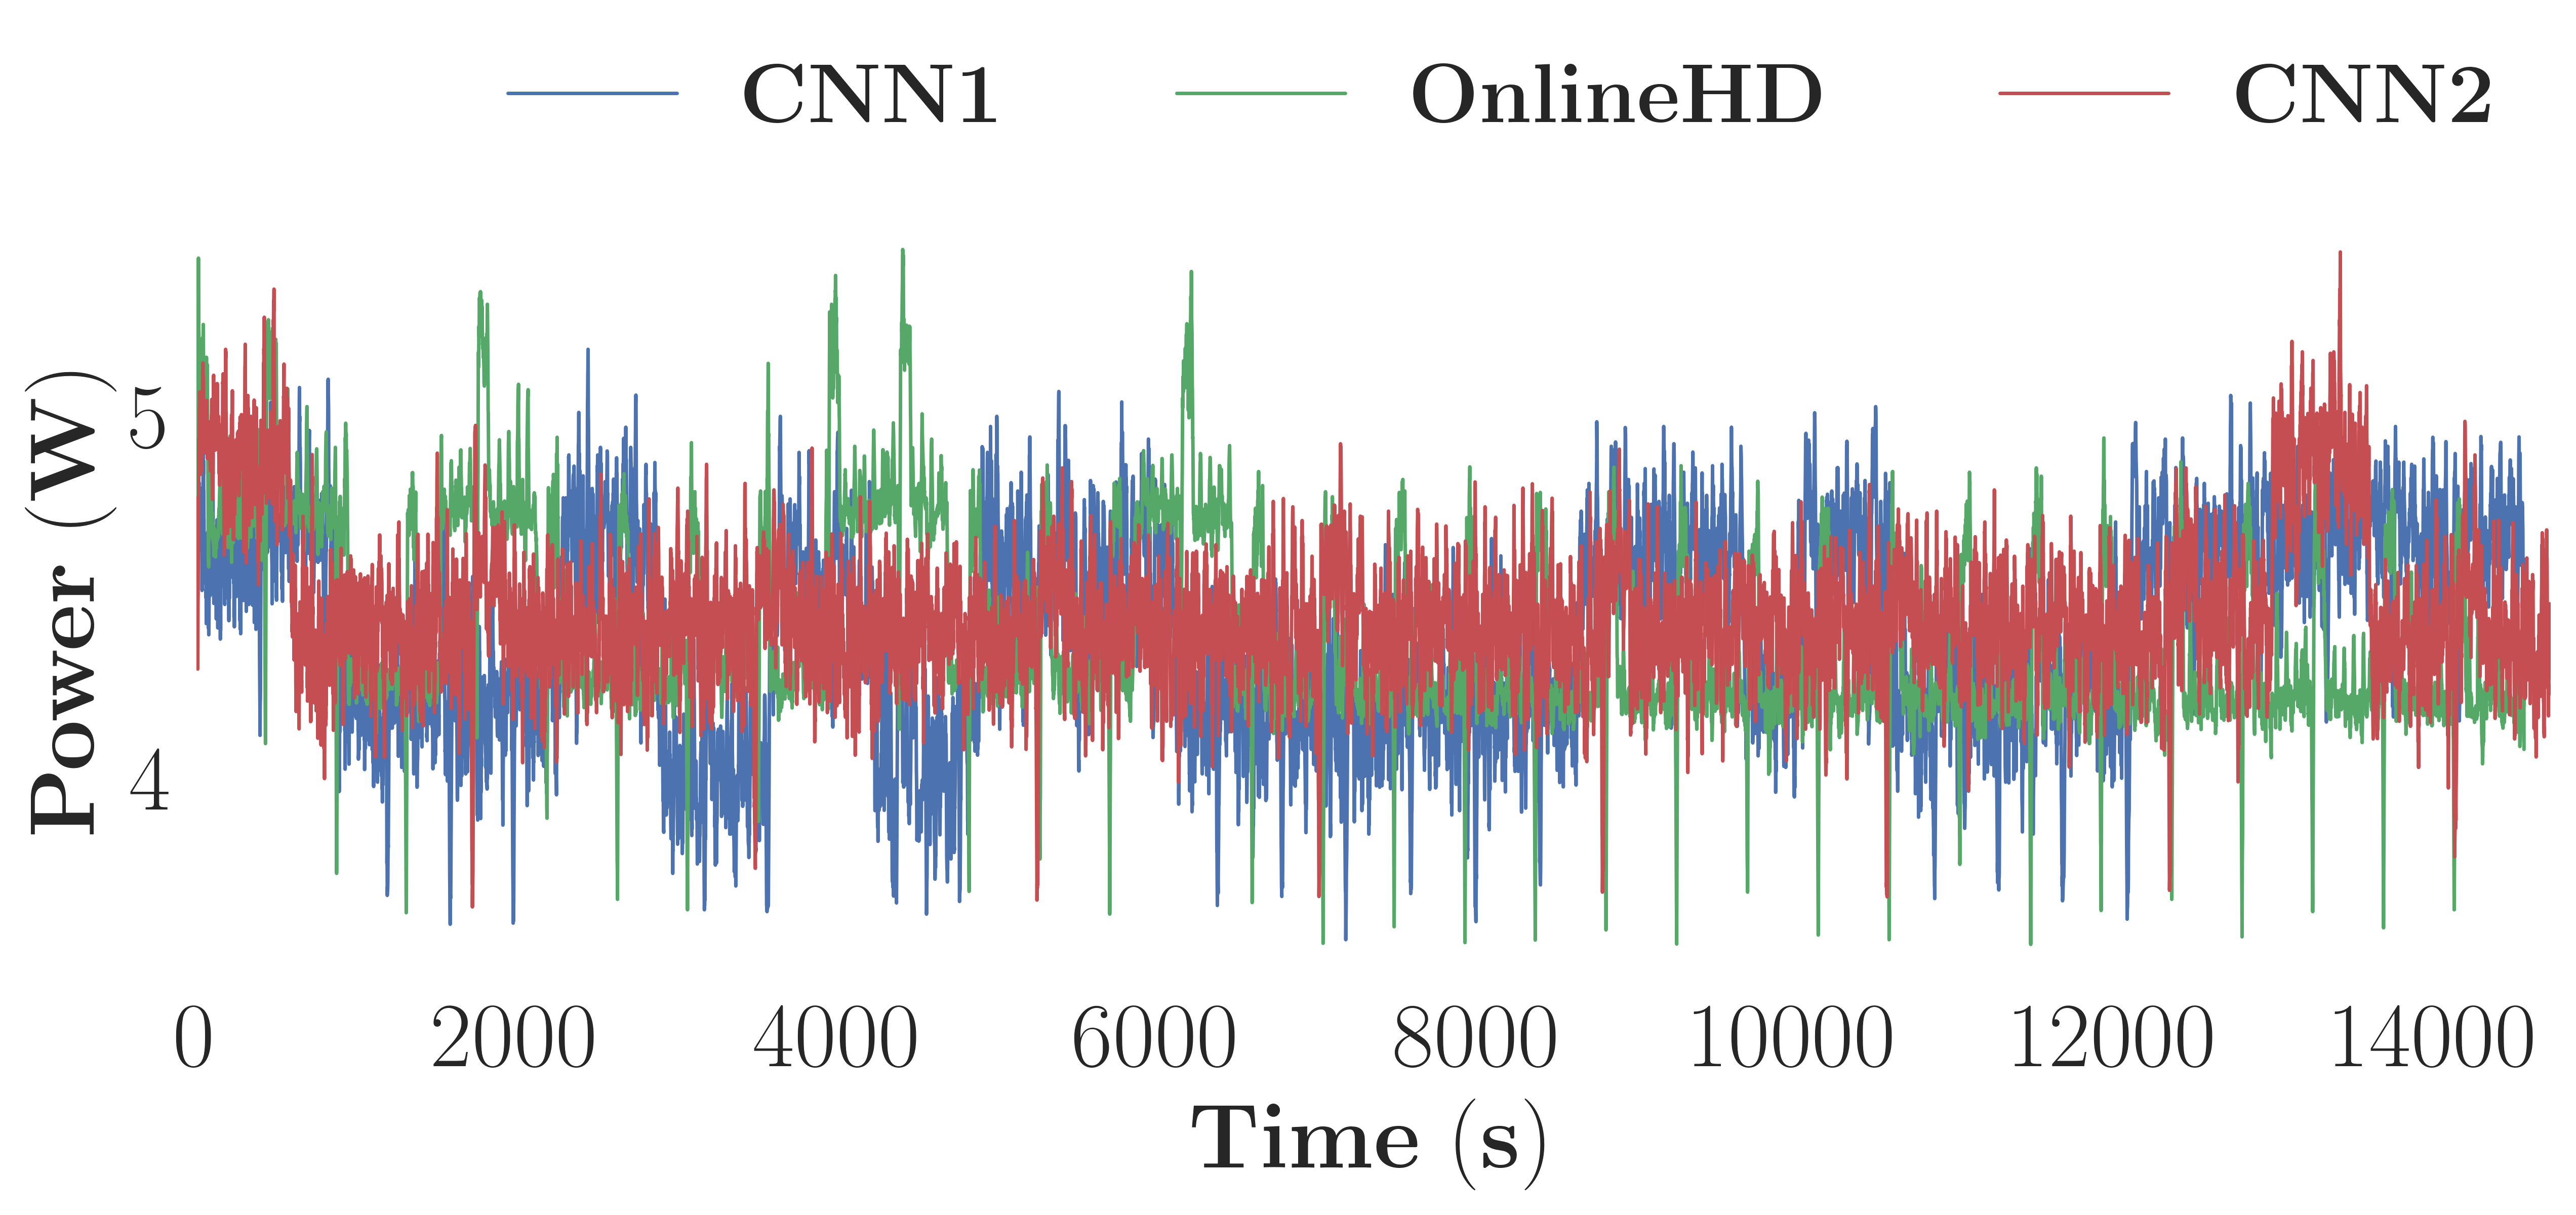

In [ ]:
'''power'''
# Temperature plot
import matplotlib
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
# from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


# Using seaborn's style
# plt.style.use('seaborn')

# rc('font', weight='bold')
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 26,
    "font.size": 26,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 26,
    "xtick.labelsize": 26,
    "ytick.labelsize": 26
}

plt.rcParams.update(tex_fonts)

figure(figsize=(12, 4), dpi=500)

d = {'onlinehd power':onlinehd_power,'cnn power':cnn_power,'onlinehd frequency':onlinehd_freq,'cnn frequency':cnn_freq,'onlinehd temp':onlinehd_temp , 'cnn temp':cnn_temp, 'realtive time cnn(sec)':realtive_time_cnn, 'realtive time hd(sec)':realtive_time_hd,'onlinehd cpu':onlinehd_cpu,'cnn cpu':cnn_cpu}


df8_hdpower=pd.DataFrame(data={'onlinehd power':onlinehd_power})
df8_cnnpower=pd.DataFrame(data={'cnn power':cnn_power})
df8_cnn2power=pd.DataFrame(data={'cnn2 power':cnn2_power})


y2=list(df8_hdpower['onlinehd power'].rolling(10, min_periods=1).mean())
y1=list(df8_cnnpower['cnn power'].rolling(10, min_periods=1).mean())
y3=list(df8_cnn2power['cnn2 power'].rolling(10, min_periods=1).mean())


plt.plot(x1, y1, lw=1, label=r"$\bf{CNN1}$")
plt.plot(x2, y2, lw=1, label=r"$\bf{OnlineHD}$")
plt.plot(x3, y3,lw=1, label=r"$\bf{CNN2}$")

ax = plt.gca()
ax.set_xlim([0, 14700])
# ax.set_ylim([50, 85])
plt.legend(bbox_to_anchor =(0.10, 1.0), ncol = 3,  prop={"size":24})

plt.xlabel(r"$\bf{Time\ (s)}$")
plt.ylabel(r"$\bf{Power\ (W)}$")

ax = plt.axes()
  
# Setting the background color of the plot 
# using set_facecolor() method
ax.set_facecolor("white")

plt.grid(False)
#import tikzplotlib

# plt.savefig('temperature.pgf')
plt.savefig('power.pdf', format='pdf', bbox_inches='tight')
plt.savefig('power.svg')
plt.savefig('power.png')
#plt.savefig('histogram.pgf')

#tikzplotlib.save("temperature.tex")

#plt.show()
# plt.xlabel("$\text{time (s)}")
# plt.ylabel("$\text{Temperature (°C)}")
# plt.title("Simple plot $\\frac{\\alpha}{2}$")

import tikzplotlib

tikzplotlib.save("power.tex")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


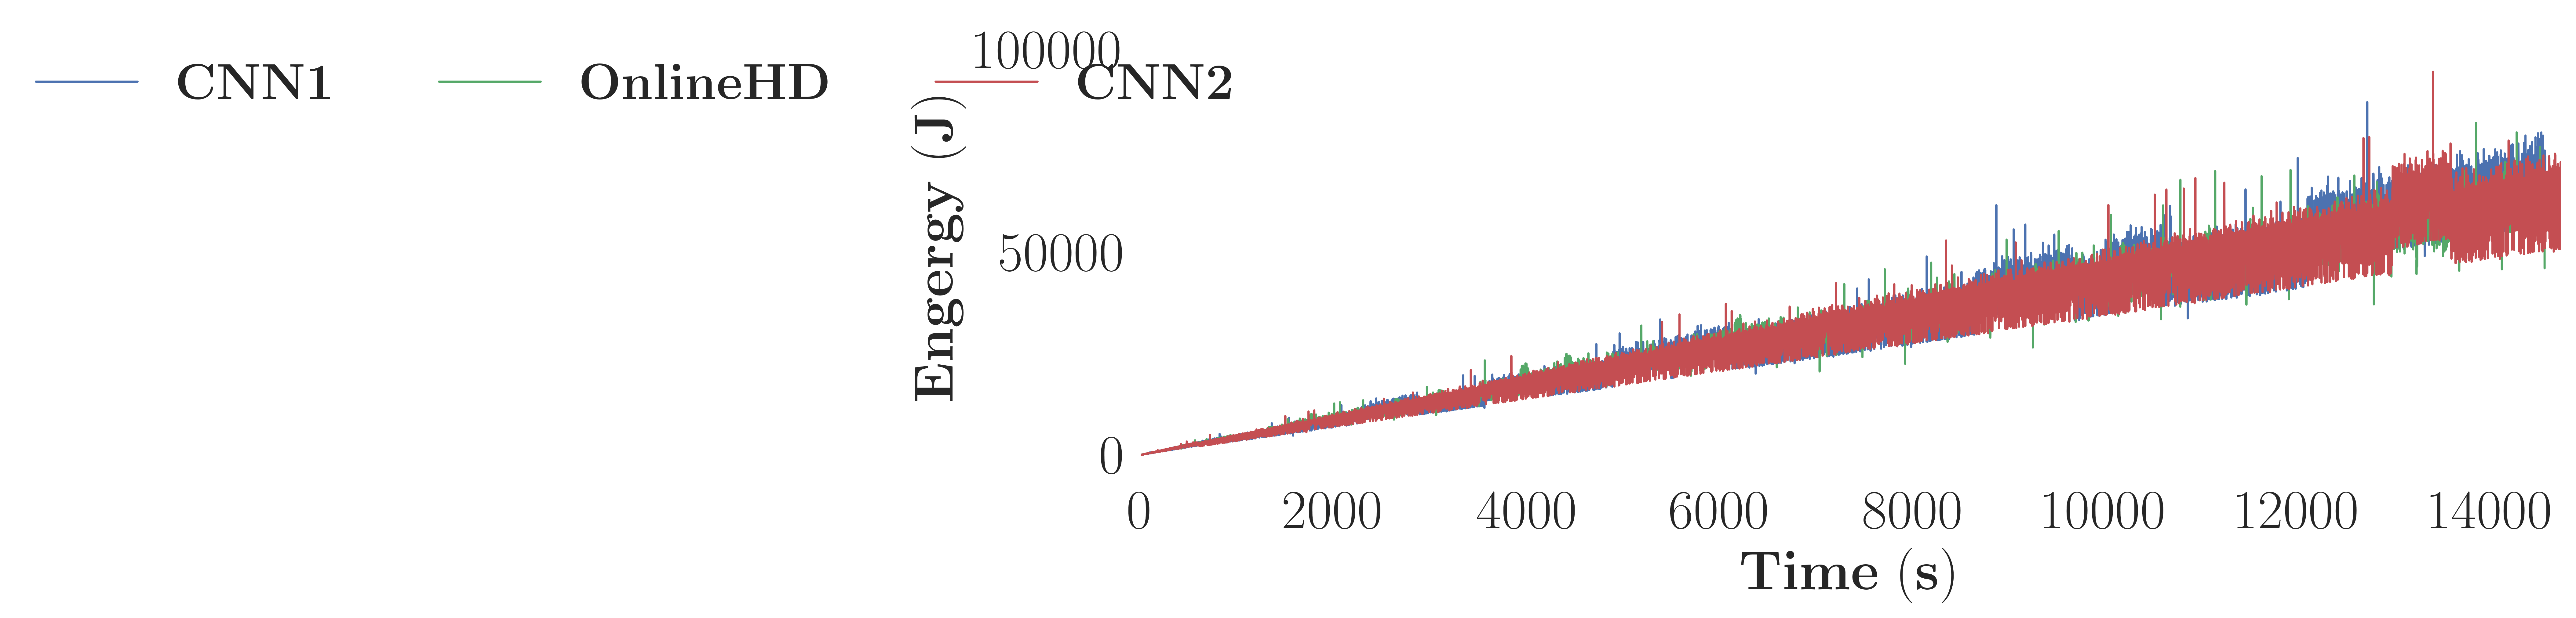

In [ ]:
'''Energy plots'''

# Temperature plot
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 26,
    "font.size": 26,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 26,
    "xtick.labelsize": 26,
    "ytick.labelsize": 26
}

plt.rcParams.update(tex_fonts)

figure(figsize=(12, 4), dpi=500)

#d = {'onlinehd power':onlinehd_power,'cnn power':cnn_power,'onlinehd frequency':onlinehd_freq,'cnn frequency':cnn_freq,'onlinehd temp':onlinehd_temp , 'cnn temp':cnn_temp, 'realtive time cnn(sec)':realtive_time_cnn, 'realtive time hd(sec)':realtive_time_hd,'onlinehd cpu':onlinehd_cpu,'cnn cpu':cnn_cpu}


#df8_hdpower=pd.DataFrame(data={'onlinehd power':onlinehd_power})
#df8_cnnpower=pd.DataFrame(data={'cnn power':cnn_power})
#df8_cnn2power=pd.DataFrame(data={'cnn2 power':cnn2_power})


#y2=list(df8_hdpower['onlinehd power'].rolling(10, min_periods=1).mean())
#y1=list(df8_cnnpower['cnn power'].rolling(10, min_periods=1).mean())
#y3=list(df8_cnn2power['cnn2 power'].rolling(10, min_periods=1).mean())



plt.plot(x1, y5, lw=1, label=r"$\bf{CNN1}$")
plt.plot(x2, y4, lw=1, label=r"$\bf{OnlineHD}$")
plt.plot(x3, y6,lw=1, label=r"$\bf{CNN2}$")

ax = plt.gca()
ax.set_xlim([0, 14700])
# ax.set_ylim([50, 85])
plt.legend(bbox_to_anchor =(0.10, 1.0), ncol = 3,  prop={"size":24})

plt.xlabel(r"$\bf{Time\ (s)}$")
plt.ylabel(r"$\bf{Engergy\ (J)}$")

ax = plt.axes()
  
# Setting the background color of the plot 
# using set_facecolor() method
ax.set_facecolor("white")

plt.grid(False)
#import tikzplotlib

# plt.savefig('temperature.pgf')
plt.savefig('energy.pdf', format='pdf', bbox_inches='tight')
plt.savefig('energy.svg')
plt.savefig('energy.png')

import tikzplotlib

tikzplotlib.save("energy.tex")
